In [38]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import scipy.stats as stats

from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from statsmodels.stats.diagnostic import normal_ad

гипотезы о том что а не если

In [39]:
df = pd.read_csv("Задания/Datasets/babyboom.dat.txt", delim_whitespace=True, header=None, on_bad_lines='skip')
df.columns = ['TimeOfBirth', 'Sex', 'Weight', 'MinutesAfterMidnight']
print(df.shape)
df.head(20)

(44, 4)


/var/folders/19/c1rn4t0n4qn2h0cjhj9f9_3r0000gn/T/ipykernel_61084/104793328.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("Задания/Datasets/babyboom.dat.txt", delim_whitespace=True, header=None, on_bad_lines='skip')


,TimeOfBirth,Sex,Weight,MinutesAfterMidnight
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177
5,405,1,2208,245
6,407,1,1745,247
7,422,2,2846,262
8,431,2,3166,271
9,708,2,3520,428


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   TimeOfBirth           44 non-null     int64
 1   Sex                   44 non-null     int64
 2   Weight                44 non-null     int64
 3   MinutesAfterMidnight  44 non-null     int64
dtypes: int64(4)
memory usage: 1.5 KB


In [41]:
data = df.copy()
df.isnull().sum()

TimeOfBirth             0
Sex                     0
Weight                  0
MinutesAfterMidnight    0
dtype: int64

In [42]:
#Будем работать с критерием shapiro-wilk
boys_data = df[df['Sex'] == 2]
girl_data = df[df['Sex'] == 1]

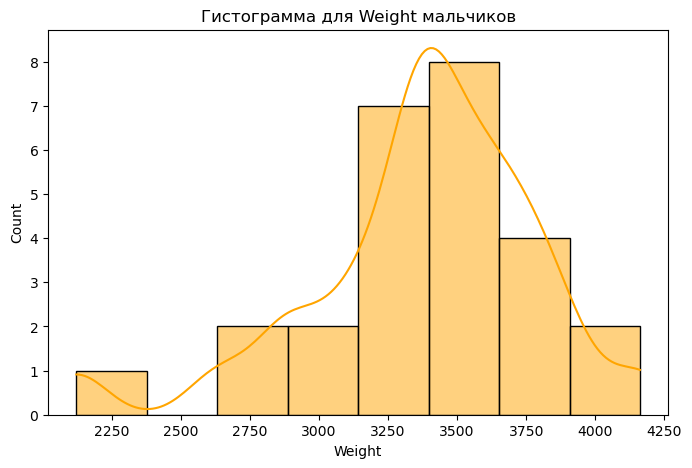

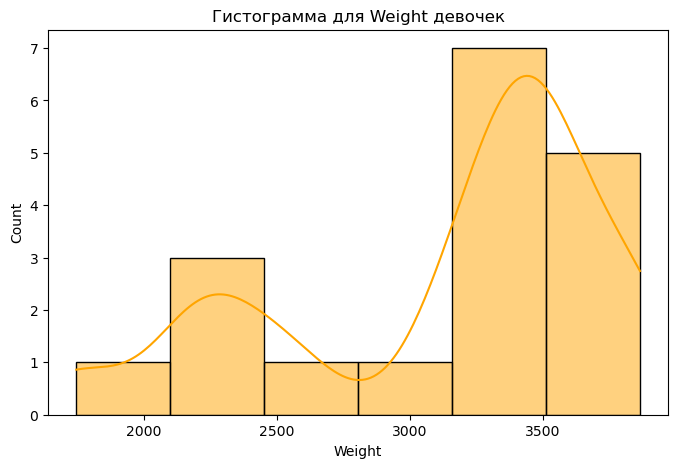

In [43]:
plt.figure(figsize=(8, 5))
sns.histplot(boys_data['Weight'], kde=True, color='orange',kde_kws={'bw_adjust': 0.5})  
# kde=True добавляет линию плотности
# dw_adjust настраивает уровень сглаживания kde
plt.title(f'Гистограмма для Weight мальчиков')
plt.show()
plt.figure(figsize=(8, 5))
sns.histplot(girl_data['Weight'], kde=True, color='orange',kde_kws={'bw_adjust': 0.5})  
# kde=True добавляет линию плотности
# dw_adjust настраивает уровень сглаживания kde
plt.title(f'Гистограмма для Weight девочек')
plt.show()

In [44]:
# Shapiro-Wilk
stat, p = stats.shapiro(boys_data['Weight'])
print('Shapiro-Wilk boys:')
print('Статистика:', stat, 'p-значение:', p)
if p<0.05:
    print( "Нет нормального расспределения")
if p>0.05:
    print( "Есть нормальное расспределение")
# Shapiro-Wilk
stat, p = stats.shapiro(girl_data['Weight'])
print('Shapiro-Wilk girls:')
print('Статистика:', stat, 'p-значение:', p)
if p<0.05:
    print( "Нет нормального расспределения")
if p>0.05:
    print( "Есть нормальное расспределение")

Shapiro-Wilk boys:
Статистика: 0.9474738942208476 p-значение: 0.20224825440795427
Есть нормальное расспределение
Shapiro-Wilk girls:
Статистика: 0.8702829450561838 p-значение: 0.017984789994719325
Нет нормального расспределения


Т.к вес девочек имеет не нормальное распределениеб будем использовать непараметрические методы.

In [45]:

# Проведение теста Краскела-Уоллиса
h_statistic, p_value = stats.kruskal(girl_data['Weight'], boys_data['Weight'])

# Вывод результатов
print(f"H-статистика: {h_statistic}")
print(f"P-значение: {p_value}")

# Интерпретация результатов
alpha = 0.05
if p_value < alpha:
    print("Отклоняем нулевую гипотезу: распределения различаются.")
else:
    print("Не удалось отклонить нулевую гипотезу: распределения не различаются.")

H-статистика: 0.889093995408741
P-значение: 0.3457229446672261
Не удалось отклонить нулевую гипотезу: распределения не различаются.


In [46]:
# Проведение теста Левене для проверки равенства дисперсий
levene_statistic, levene_p_value = stats.levene(girl_data['Weight'], boys_data['Weight'])

# Вывод результатов теста Левене
print(f"Статистика Левене: {levene_statistic}")
print(f"P-значение Левене: {levene_p_value}")

# Интерпретация результатов теста Левене
alpha = 0.05
if levene_p_value < alpha:
    print("Отклоняем нулевую гипотезу: дисперсии различаются.")
else:
    print("Не удалось отклонить нулевую гипотезу: дисперсии не различаются.")

Статистика Левене: 1.8154103472308154
P-значение Левене: 0.18508483634639278
Не удалось отклонить нулевую гипотезу: дисперсии не различаются.



**Формула теста Левене**
$$F = \frac{\frac{\sum_{i=1}^{k} n_i (\tilde{d}i - \tilde{d})^2}{k - 1}}{\frac{\sum{i=1}^{k} \sum_{j=1}^{n_i} (d_{ij} - \tilde{d}_i)^2}{N - k}}
